<a href="https://colab.research.google.com/github/Rajeshgit-R/sentiment_analysis_system_project/blob/main/sentiment_analysis_system_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# importing the requirement libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download("stopwords")
from nltk.corpus import stopwords
STOPWORDS=set(stopwords.words("english"))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
!pip install wordcloud

In [87]:
# load the dataset

data=pd.read_csv("/content/drive/MyDrive/Data/amazon_alexa.tsv",delimiter="\t",quoting=3)

In [88]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [90]:
print(f"features names:{data.columns.values}")

features names:['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [91]:
data[data["verified_reviews"].isna()==True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [92]:
data.dropna(inplace=True)

In [93]:
data.isnull().sum()

,0
rating,0
date,0
variation,0
verified_reviews,0
feedback,0


In [94]:
data.shape

(3149, 5)

In [95]:
# creating  a new column length that will contain the length of the string  in verified_reviews column

data["length"]=data["verified_reviews"].apply(len)

In [96]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [98]:
# Randomly checking for 10th record

print(f"'verified_reviews' column value:{data.iloc[10]['verified_reviews']}") #Original value
print(f"length of review :{len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column values:{data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value:"I sent it to my 85 year old Dad, and he talks to it constantly."
length of review :65
'length' column values:65


In [99]:
data.dtypes

,0
rating,int64
date,object
variation,object
verified_reviews,object
feedback,int64
length,int64


In [100]:
len(data)

3149

In [101]:
print(f"Rating value count:\n{data['rating'].value_counts()}")

Rating value count:
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


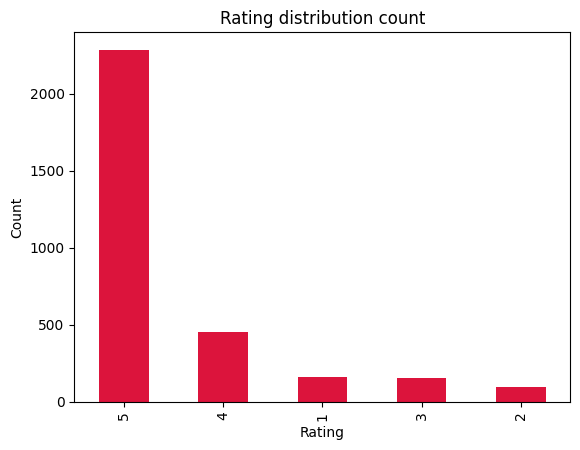

In [102]:
# Bar plot to visualize the total count of each rating

data["rating"].value_counts().plot.bar(color="crimson")
plt.title("Rating distribution count")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [103]:
# finding the percentage distribution of each rating

print(f"Rating value count-percentage distribution:\n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count-percentage distribution:
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


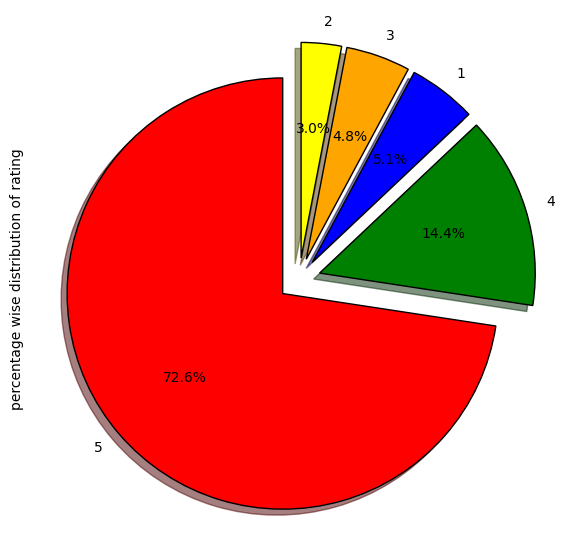

In [104]:
# percenatage wise distribution of rating using pie chart- we'll divide the number of records for each rating by total number of records.

fig=plt.figure(figsize=(7,7))
colors=("red","green","blue","orange","yellow")
wp={"linewidth":1,"edgecolor":"black"}
tags=data["rating"].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
tags.plot(kind="pie",autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label="percentage wise distribution of rating")
from io import BytesIO
graph=BytesIO()
fig.savefig(graph,format="png")

In [106]:
# Distinct values of feedback and its count

print(f"Feedback value count:\n{data['feedback'].value_counts()}")

Feedback value count:
feedback
1    2893
0     256
Name: count, dtype: int64


In [107]:
# extracting the verified reviews value for one record with feedback=0

review_0=data[data["feedback"]==0].iloc[1]["verified_reviews"]
print(review_0)

Sound is terrible if u want good music too get a bose


In [108]:
# extracting the verified reviews value for one record with feedback=1

review_1=data[data["feedback"]==1].iloc[1]["verified_reviews"]
print(review_1)

Loved it!


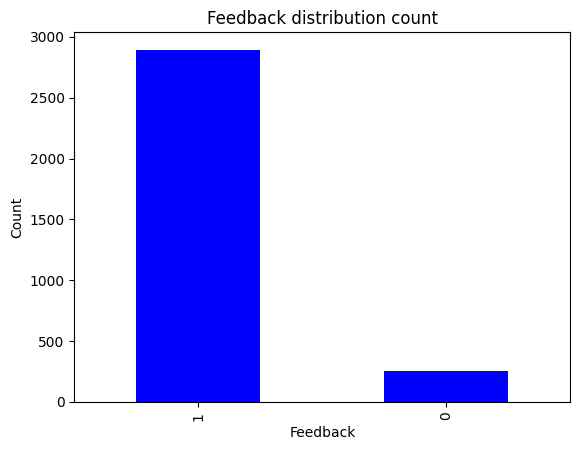

In [109]:
# Bar graph to visualize the total counts of each feedback

data["feedback"].value_counts().plot.bar(color="blue")
plt.title("Feedback distribution count")
plt.xlabel("Feedback")
plt.ylabel("Count")
plt.show()

In [110]:
# finding the percentage distribution of each feedback

print(f"Feedback value count-percentage distribution : \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count-percentage distribution : 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


<Axes: ylabel='percentage wise distribution of feedback'>

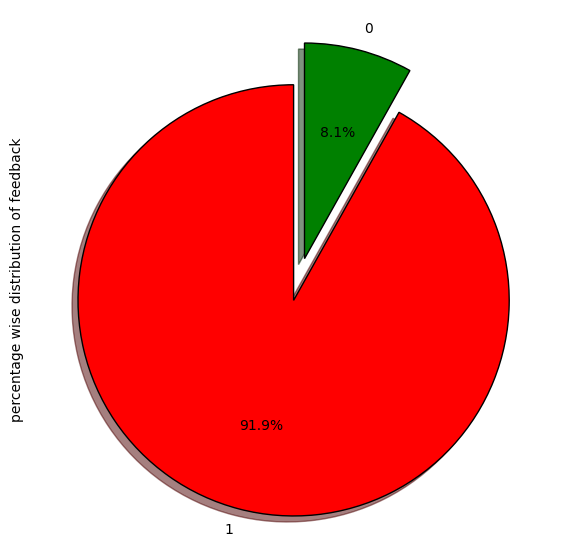

In [111]:
# finding the percentage distribution of each feedback using pie chart- we'll divide the number of records for each feedback by total number of records

fig=plt.figure(figsize=(7,7))
colors=("red","green")
wp={"linewidth":1,"edgecolor":"black"}
tags=data["feedback"].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind="pie",autopct="%1.1f%%",shadow=True,colors=colors,startangle=90,wedgeprops=wp,explode=explode,label="percentage wise distribution of feedback")

In [112]:
# feedback=0

data[data["feedback"]==0]["rating"].value_counts()

,count
rating,
1,161
2,95


In [113]:
# feedback=1

data[data["feedback"]==1]["rating"].value_counts()

,count
rating,
5,2286
4,455
3,152


In [114]:
# Distinct values of variations and its counts

print(f"Variation value count:\n{data['variation'].value_counts()}")

Variation value count:
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


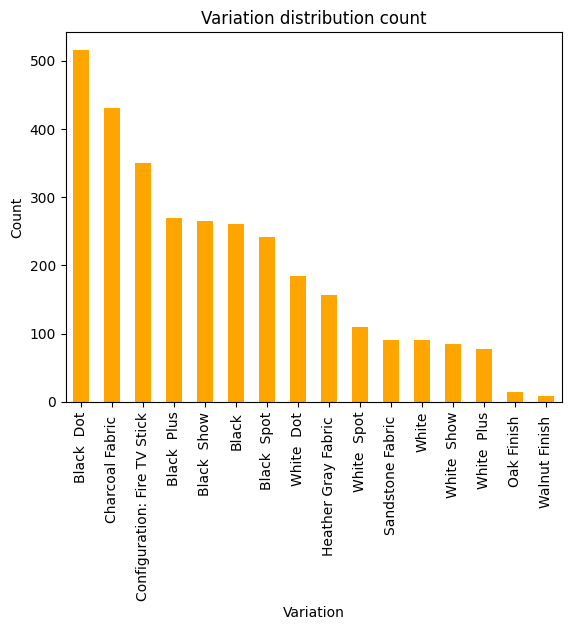

In [115]:
# bar graph to visualize the total counts of each variation

data["variation"].value_counts().plot.bar(color="orange")
plt.title("Variation distribution count")
plt.xlabel("Variation")
plt.ylabel("Count")
plt.show()

In [116]:
# finding the percentage distribution of each variation-we'll divide the number of records for each variation by total number of records

print(f"Variation value count-percentage distribution:\n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count-percentage distribution:
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


In [117]:
data.groupby("variation")["rating"].mean()

,rating
variation,
Black,4.233716
Black Dot,4.453488
Black Plus,4.370370
Black Show,4.490566
Black Spot,4.311203
Charcoal Fabric,4.730233
Configuration: Fire TV Stick,4.591429
Heather Gray Fabric,4.694268
Oak Finish,4.857143


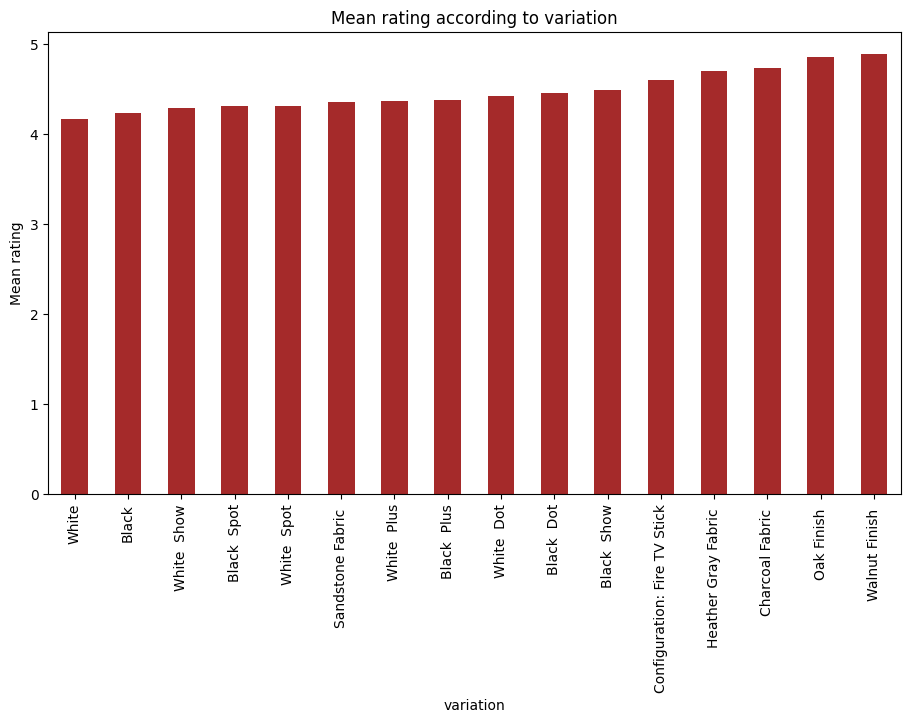

In [118]:
# Mean Rating Distribution by Variation

data.groupby("variation")["rating"].mean().sort_values().plot.bar(color="brown",figsize=(11,6))
plt.title("Mean rating according to variation")
plt.xlabel("variation")
plt.ylabel("Mean rating")
plt.show()

In [119]:
data["length"].describe()

,length
count,3149.000000
mean,132.714513
std,182.541531
min,1.000000
25%,30.000000
50%,74.000000
75%,166.000000
max,2853.000000


[Text(0.5, 1.0, 'Distribution of length of review')]

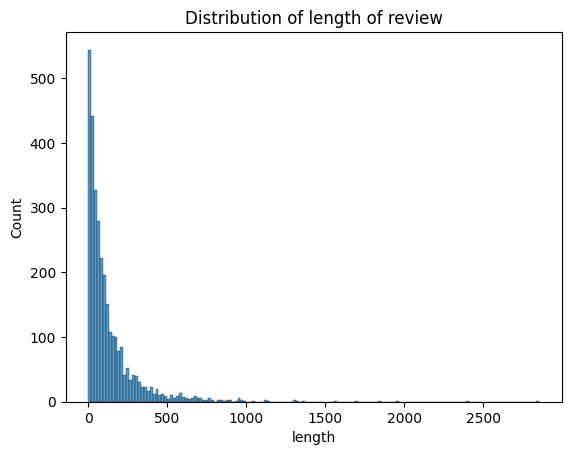

In [35]:
# Distribution of Length of Review

sns.histplot(data["length"]).set(title="Distribution of length of review")

[Text(0.5, 1.0, 'Distribution of length of review for feedback=0')]

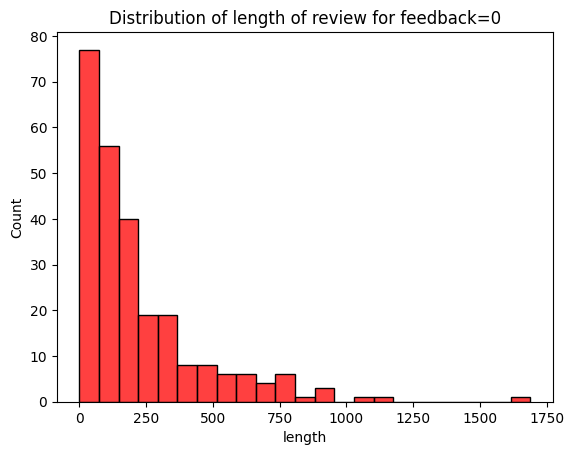

In [120]:
# Distribution of Length of Review for feedback = 0

sns.histplot(data[data["feedback"]==0]["length"],color="red").set(title="Distribution of length of review for feedback=0")

[Text(0.5, 1.0, 'Distribution of length of review if feedback=1')]

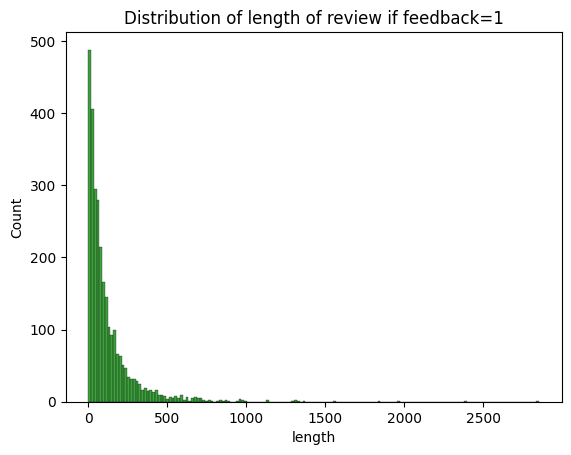

In [121]:
# Distribution of length of review if feedback=1

sns.histplot(data[data["feedback"]==1]["length"],color="green").set(title="Distribution of length of review if feedback=1")

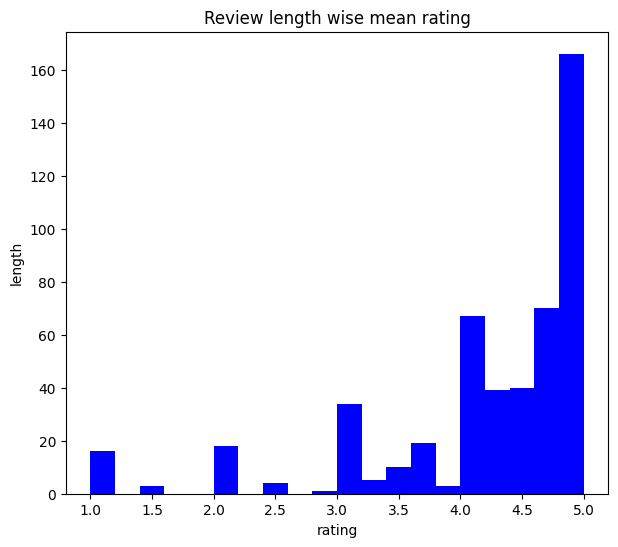

In [122]:
# Review length wise mean rating

data.groupby("length")["rating"].mean().plot.hist(color="blue",figsize=(7,6),bins=20)
plt.title("Review length wise mean rating")
plt.xlabel("rating")
plt.ylabel("length")
plt.show()

In [123]:
cv=CountVectorizer(stop_words="english")
words=cv.fit_transform(data.verified_reviews)

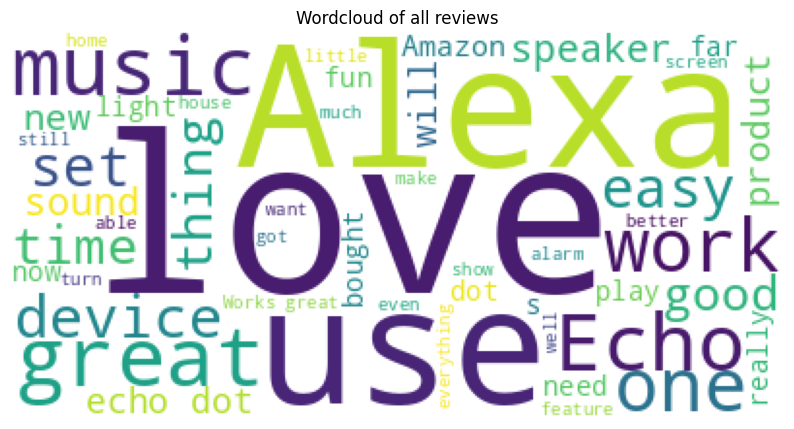

In [124]:
# combine all reviews
reviews=" ".join([review for review in data["verified_reviews"]])

#initalize wordcloud object
wc=WordCloud(background_color="white",max_words=50)

#generate and plot wordcloud

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title("Wordcloud of all reviews")
plt.axis("off")
plt.show()

In [125]:
# combine all reviews for each feedback category and splitting them into individual words

neg_reviews=" ".join([review for review in data[data["feedback"]==0]["verified_reviews"]])
neg_reviews=neg_reviews.lower().split()

pos_reviews=" ".join([review for review in data[data["feedback"]==1]["verified_reviews"]])
pos_reviews=pos_reviews.lower().split()

#finding words from reviews which are present in that feedback category only
unique_negative=[x for x in neg_reviews if x not in pos_reviews]
unique_negative=" ".join(unique_negative)

unique_positive=[x for x in pos_reviews if x not in neg_reviews]
unique_positive=" ".join(unique_positive)

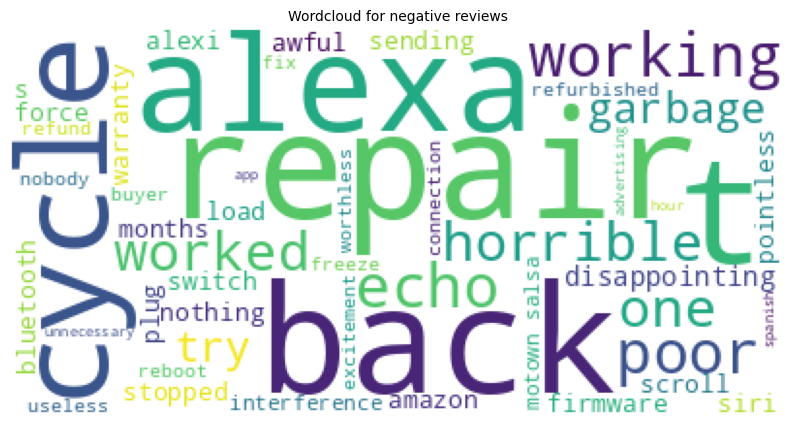

In [126]:
wc=WordCloud(background_color="white",max_words=50)

# generate and plot wordcloud for negative reviews

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title("Wordcloud for negative reviews",fontsize=10)
plt.axis("off")
plt.show()

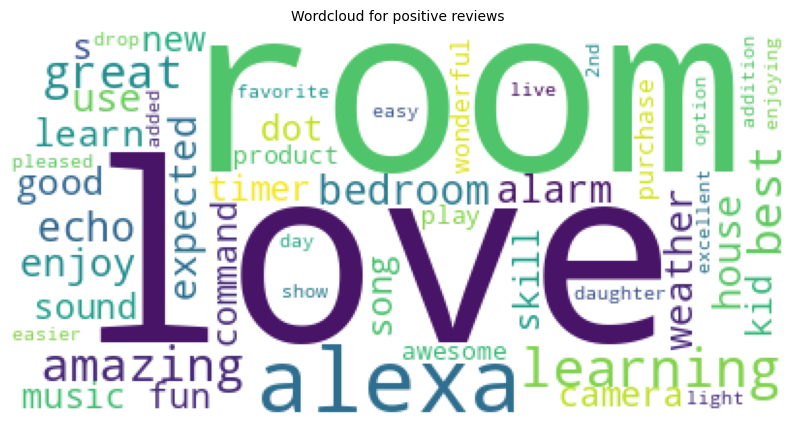

In [127]:
wc=WordCloud(background_color="white",max_words=50)

# generate and plot wordcloud for positive reviews

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title("Wordcloud for positive reviews",fontsize=10)
plt.axis("off")
plt.show()

In [128]:
corpus=[]
stemmer=PorterStemmer()
for i in range(0,data.shape[0]):
  review=re.sub("[^a-zA-Z]"," ",data.iloc[i]["verified_reviews"])
  review=review.lower().split()
  review=[stemmer.stem(word) for word in review if not word in STOPWORDS]
  review=" ".join(review)
  corpus.append(review)

In [129]:
# Using Count Vectorizer to create bag of words.

cv=CountVectorizer(max_features=2500)

# storing the independent and dependent variable i x and y

X=cv.fit_transform(corpus).toarray()
y=data["feedback"].values

In [130]:
# saving the count vectorize

pickle.dump(cv,open("/content/drive/MyDrive/Data/countVectorizer.pkl","wb"))

In [131]:
print(f"X shape:{X.shape}")
print(f"y shpe:{y.shape}")

X shape:(3149, 2500)
y shpe:(3149,)


In [132]:
# split the model

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=15)
print(f"X train:{X_train.shape}")
print(f"y train:{y_train.shape}")
print(f"X test:{X_test.shape}")
print(f"y test:{y_test.shape}")

X train:(2204, 2500)
y train:(2204,)
X test:(945, 2500)
y test:(945,)


In [133]:
print(f"X train max value:{X_train.max()}")
print(f"X test max value:{X_test.max()}")

X train max value:12
X test max value:10


In [134]:
scaler=MinMaxScaler()
X_train_scl=scaler.fit_transform(X_train)
x_test_scl=scaler.fit_transform(X_test)

In [135]:
# saving the scaler model

pickle.dump(scaler,open("/content/drive/MyDrive/Data/scaler.pkl","wb"))

In [136]:
# fitting scaled X_train and y_train on RandomForestClassifier

model_rf=RandomForestClassifier()
model_rf.fit(X_train_scl,y_train)

RandomForestClassifier()

In [137]:
# Accuracy of the model on training and testing data

print("Training Accuracy :",model_rf.score(X_train_scl,y_train))
print("Testing Accuracy :",model_rf.score(X_test,y_test))

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9396825396825397


In [138]:
# predict on the test set

y_pred=model_rf.predict(X_test)

In [140]:
# confusion matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 39  39]
 [ 18 849]]


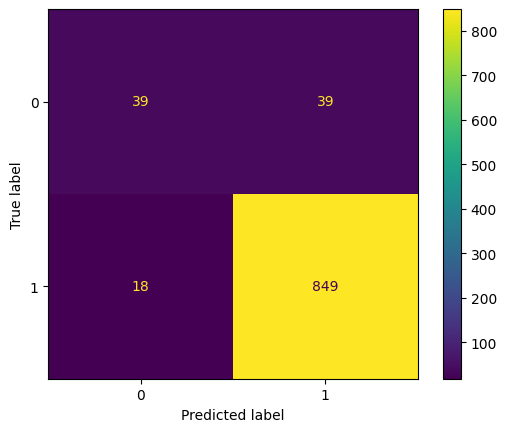

In [141]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [142]:
# k fold cross validation

accuracies=cross_val_score(estimator=model_rf,X=X_train_scl,y=y_train,cv=10)
print("Mean Accuracy:",accuracies.mean())
print("Standard varience:",accuracies.std())

Mean Accuracy: 0.9314911559029208
Standard varience: 0.005500230042178743


In [143]:
params={
    "bootstrap":[True],
    "max_depth":[80,100],
    "min_samples_split":[8,12],
    "n_estimators":[100,300]
}

In [144]:
cv_object=StratifiedKFold(n_splits=2)
grid_search=GridSearchCV(estimator=model_rf,param_grid=params,cv=cv_object,verbose=0,return_train_score=True)
grid_search.fit(X_train_scl,y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [145]:
# getting best parameter from grid search

print("Best parameter combination:{}".format(grid_search.best_params_))

Best parameter combination:{'bootstrap': True, 'max_depth': 100, 'min_samples_split': 8, 'n_estimators': 300}


In [146]:
print("crosss validation mean accuracy on train set:{}".format(grid_search.cv_results_["mean_train_score"].mean()*100))
print("cross validation mean accuracy on test set:{}".format(grid_search.cv_results_["mean_test_score"].mean()*100))
print("Accuracy score for test set:",accuracy_score(y_test,y_pred))

crosss validation mean accuracy on train set:96.7842558983666
cross validation mean accuracy on test set:92.17899274047187
Accuracy score for test set: 0.9396825396825397


In [147]:
model_dt=DecisionTreeClassifier()
model_dt.fit(X_train_scl,y_train)

DecisionTreeClassifier()

In [148]:
# Accuracy of the model on training and testing data

print("Training Accuracy:",model_dt.score(X_train_scl,y_train))
print("Testing Accuracy:",model_dt.score(X_test,y_test))

Training Accuracy: 0.9945553539019963
Testing Accuracy: 0.8592592592592593


In [149]:
y_pred=model_dt.predict(X_test)

In [150]:
# confusion matrix

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 41  37]
 [ 96 771]]


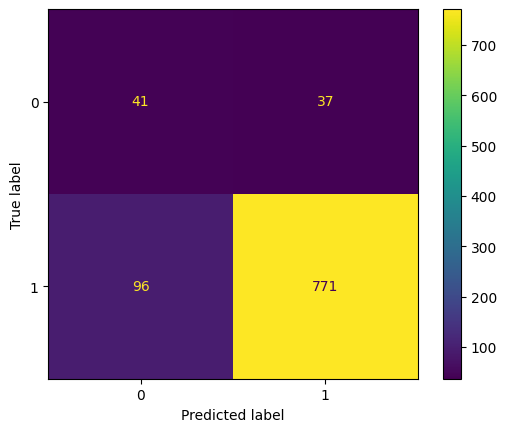

In [151]:
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()